# **Diabetes** **Predicter**

## **Data Collection:**
The Dataset is collected from https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data.

## **Describtion:**
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans.

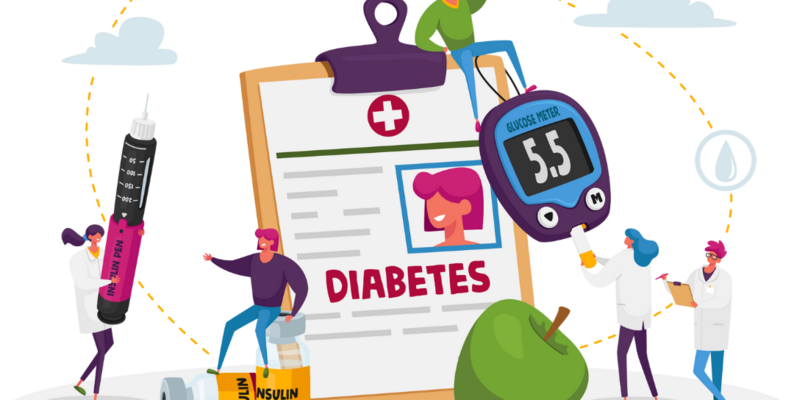

### **Import Data and Required Packages**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [69]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [70]:
print("The ammount of null values in each column")
df.isnull().sum()

The ammount of null values in each column


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

There is no missing value in dataset

### Shape of Dataset


In [71]:
df.shape

(100000, 9)

### Checking data types

In [72]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

### Checking unique values in each column

In [73]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [74]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [75]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [76]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [77]:
df.drop_duplicates(inplace=True)

### Data Describtion

In [78]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [79]:
df['diabetes'].value_counts()*100/len(df)

diabetes
0    91.178
1     8.822
Name: count, dtype: float64

## **Data Visualization**

<Axes: xlabel='diabetes', ylabel='count'>

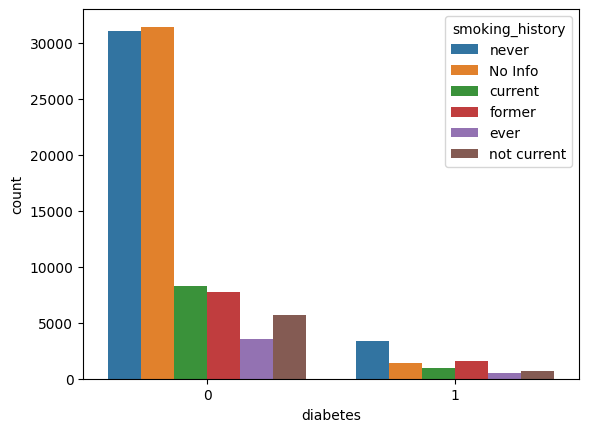

In [80]:
sns.countplot(x='diabetes',hue='smoking_history',data=df)

<Axes: xlabel='diabetes', ylabel='count'>

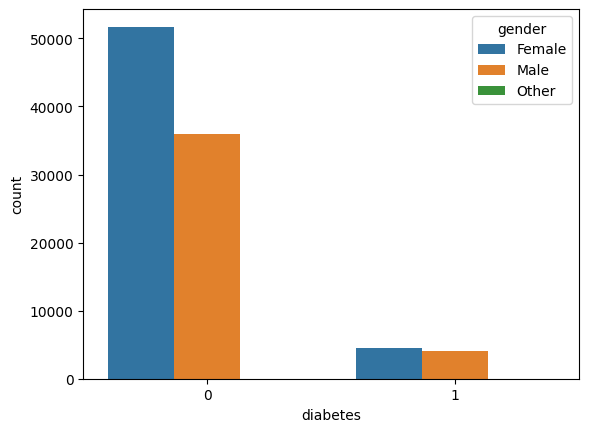

In [81]:
sns.countplot(x='diabetes',hue='gender',data=df)

This shows percent wise more males are diabetic

<Axes: xlabel='diabetes', ylabel='count'>

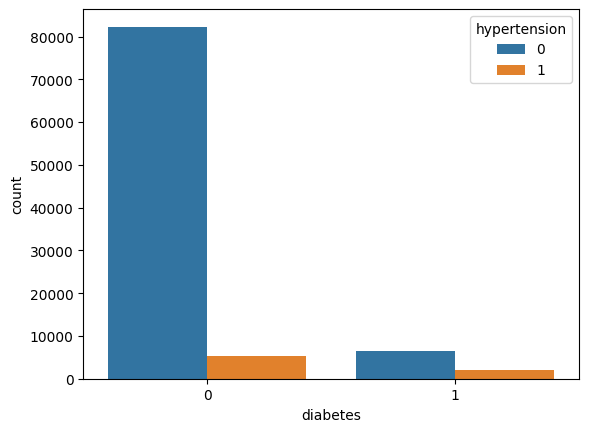

In [82]:
sns.countplot(x='diabetes',hue='hypertension',data=df)

The graph shows human with hypertension have more changes of being diabetic.


<Axes: xlabel='diabetes', ylabel='count'>

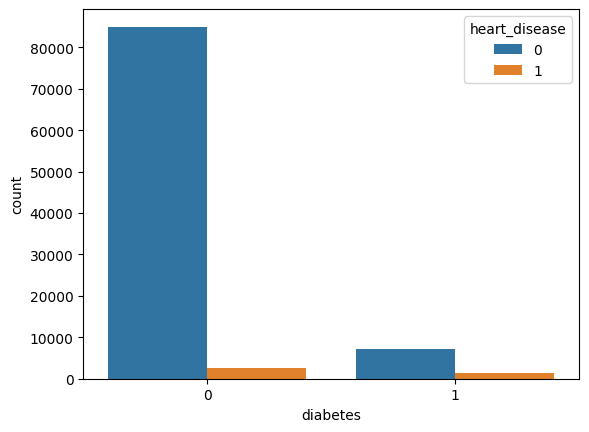

In [83]:
sns.countplot(x='diabetes',hue='heart_disease',data=df)

<Axes: xlabel='age', ylabel='Density'>

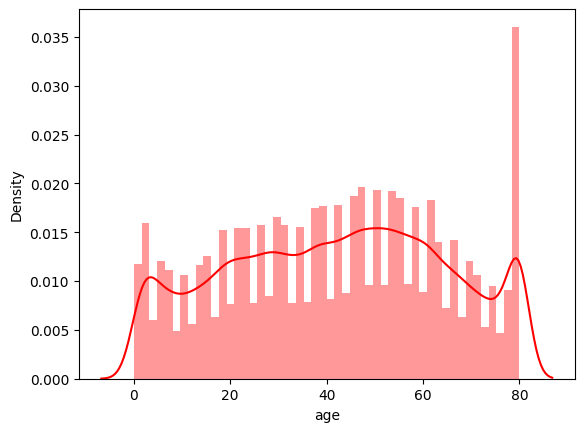

In [84]:
sns.distplot(df['age'],color = 'red')

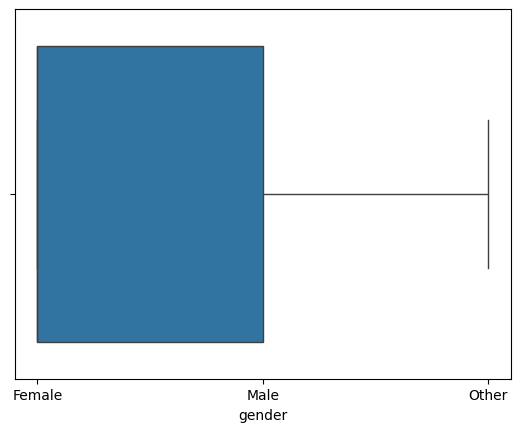

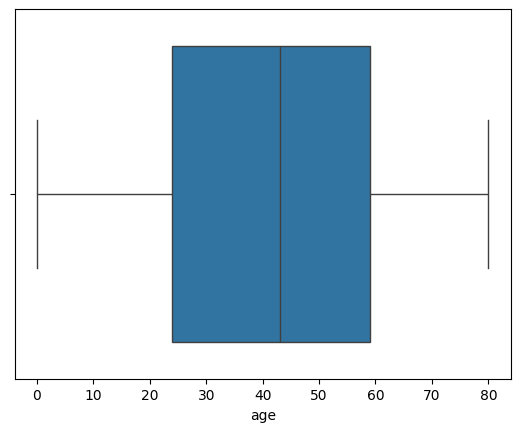

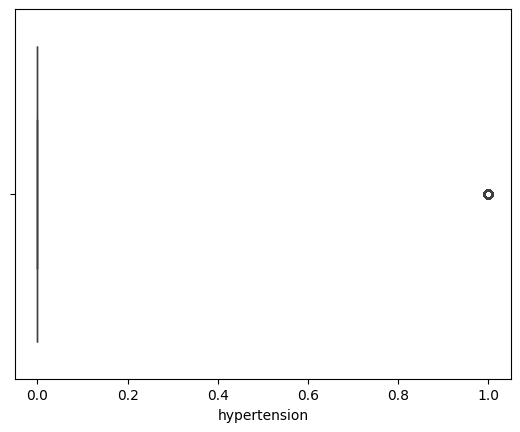

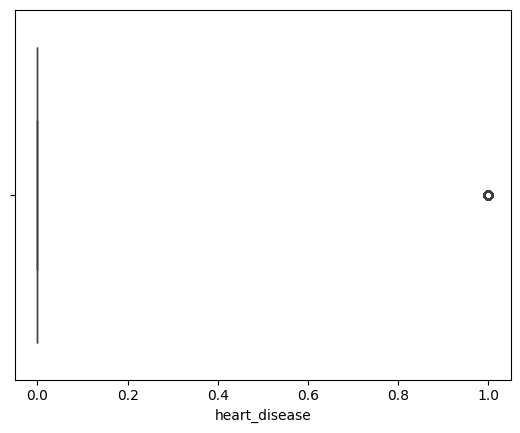

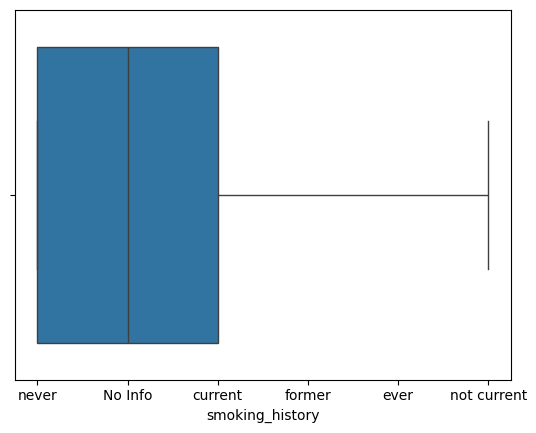

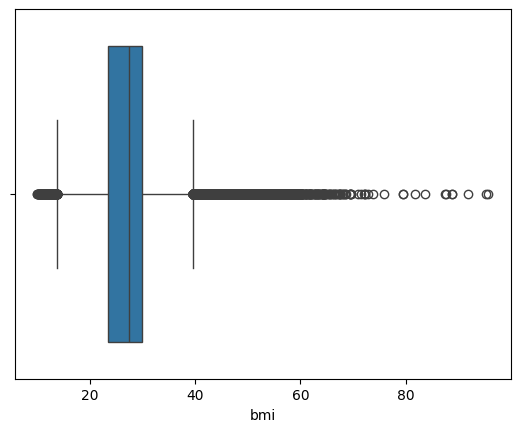

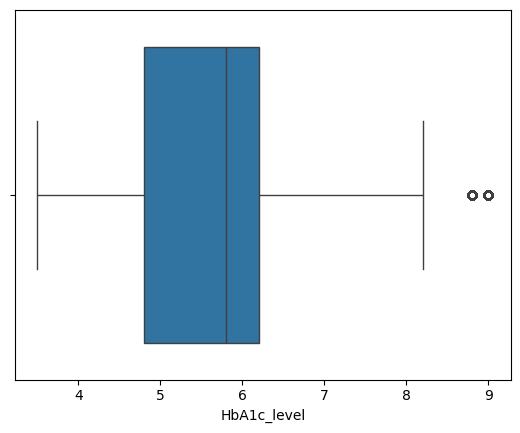

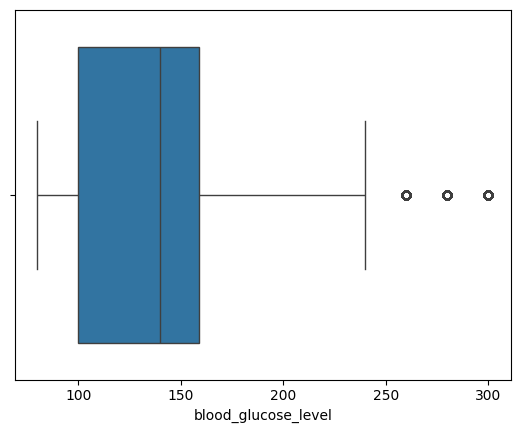

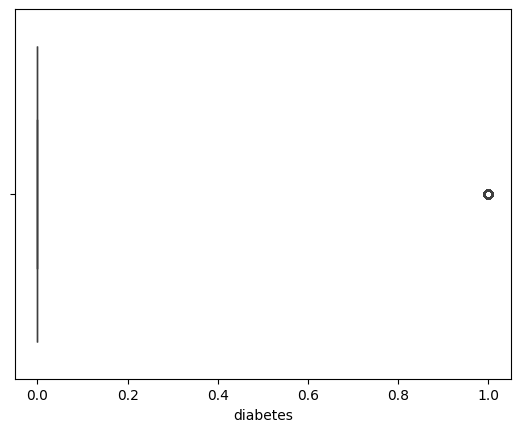

In [85]:
ls=df.columns.tolist()
for col in ls:
   sns.boxplot(x=col,data=df)
   plt.show()

## **EDA**

In [87]:
df_minority=df[df['diabetes']==1]
df_majority=df[df['diabetes']==0]

In [88]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [89]:
df_minority_upsampled.shape

(87664, 9)

In [90]:
df_minority_upsampled.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
85797,Male,73.0,0,1,former,29.53,5.7,200,1
10023,Female,60.0,0,0,No Info,17.91,8.2,126,1
62205,Female,78.0,0,0,never,39.82,6.8,155,1
59873,Male,57.0,0,0,never,27.99,6.1,140,1
66489,Female,66.0,0,0,never,27.24,7.5,160,1


In [91]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [92]:
df_upsampled['diabetes'].value_counts()

diabetes
0    87664
1    87664
Name: count, dtype: int64

In [93]:
df=df_upsampled
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [95]:
df.shape

(175328, 9)

In [96]:
df.drop_duplicates(inplace=True)

In [97]:
df['bmi'] = df['bmi'].astype(int)

In [98]:
df.age.unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 79.  , 42.  , 32.  ,
       53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  , 72.  ,
        4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  , 77.  ,
       66.  , 44.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  , 19.  ,
       46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  , 11.  ,
        6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  , 22.  ,
       58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  , 31.  ,
        8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56, 48.  , 51.  ,
       71.  ,  0.88, 52.  , 63.  ,  0.16, 10.  , 35.  , 61.  , 73.  ,
       23.  , 64.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [99]:
df['age']=df['age'].astype(int)

In [100]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25,6.6,140,0
1,Female,54,0,0,No Info,27,6.6,80,0
2,Male,28,0,0,never,27,5.7,158,0
3,Female,36,0,0,current,23,5.0,155,0
4,Male,76,1,1,current,20,4.8,155,0


In [101]:
df.nunique()

gender                  3
age                    81
hypertension            2
heart_disease           2
smoking_history         6
bmi                    72
HbA1c_level            18
blood_glucose_level    18
diabetes                2
dtype: int64

In [102]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

In [103]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25,6.6,140,0
1,0,54,0,0,0,27,6.6,80,0
2,1,28,0,0,4,27,5.7,158,0
3,0,36,0,0,1,23,5.0,155,0
4,1,76,1,1,1,20,4.8,155,0


In [104]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.00000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.783756,0.077601,0.040803,2.231159,26.87026,5.532609,138.218231,0.088220
std,0.493287,22.482208,0.267544,0.197833,1.879963,6.77297,1.073232,40.909771,0.283616
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.00000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.00000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,3.000000,27.00000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,4.000000,29.00000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.00000,9.000000,300.000000,1.000000


## **MODEL SELECTION**

In [105]:
X=df.drop('diabetes',axis=1)
y=df["diabetes"]

In [106]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9,random_state=42)
X_train.shape, X_test.shape

((9614, 8), (86532, 8))

In [107]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision


    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- Precision: {:.4f}'.format(model_test_precision))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9600
- Precision: 0.8777
----------------------------------
Model performance for Test set
- Accuracy: 0.9580
- Precision: 0.8679


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9527
- Precision: 0.7319


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9697
- Precision: 0.9727


Gradient Boost
Model performance for Training set
- Accuracy: 0.9750
- Precision: 0.9950
----------------------------------
Model performance for Test set
- Accuracy: 0.9704
- Precision: 0.9824


Adaboost
Model performance for Training set
- Accuracy: 0.9738
- Precision: 0.9771
----------------------------------
Model performance for Test set
- Accuracy: 0.9703
- Precision: 0.9676


Xgboost
Model performa

Since our dataset is imbalanced and keeping in mind that if by chance our model predict a diabetic patient as non diabetic then it could be hazadrous so we should select on basis of precision.


As Gradient Boost algorithm has best precision we can select it.

